<a href="https://colab.research.google.com/github/thallescotta/IntroducaoAnalisePreditivaEmSaudecomMachineLearning/blob/main/Avaliacao_AV1_ML_Predicao_em_Saude_Grupo_1_Thalles%2C_Mariana%2C_Luciana_e_Rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalho de predição em saúde com Machine Learning:**

# Número do grupo: 1
# Nome dos componentes do grupo: Thalles, Mariana, Luciana e Rodrigo

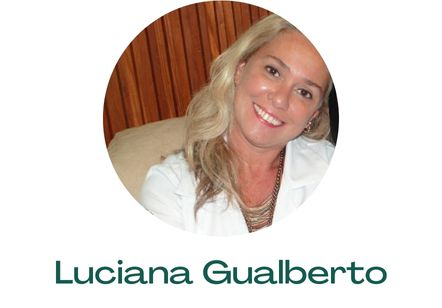Luciana é Bacharel e licenciatura em Enfermagem pela Universidade Gama Filho (1996), habilitação em médico cirúrgico, especialização em Gestão e mestranda em Telessaúde pela Universidade Estadual do Rio de Janeiro (UERJ), Experiência em Gestão e na área de Qualidade e Segurança com formação em avaliação Nacional e Internacional de Acreditação Hospitalar.

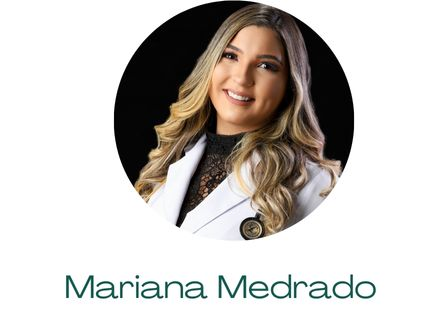Mariana Medrado Gondim é médica e entusiasta da transformação digital da saúde. Possui MBA em Gestão e inovação em Saúde.  Atualmente atua na área de Design Thinking em Produtos de Saúde Digital, utilizando IA e Machine learning na análise de dados, BIs e na criação de algoritmos em saúde. Também trabalha como idealizadora e coordenadora do serviço de Telemedicina em uma Health Tech, sendo a interface entre a área de Tecnologia de Informação e a área médica/enfermagem.

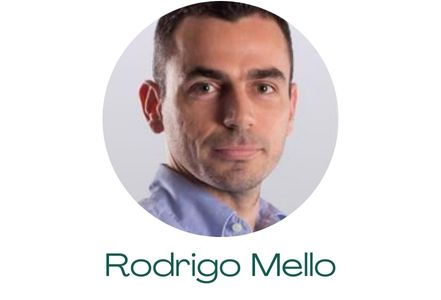Rodrigo Mello possui graduação em Medicina pela Universidade Federal Fluminense (2011). Residência em cirurgia geral pelo Hospital Federal de Ipanema. Atua na área de cirurgia bariátrica e metabólica. Professor e autor do curso preparatório para residência médica: MEDGRUPO Sócio e membro do conselho do Centro Médico Pastore.

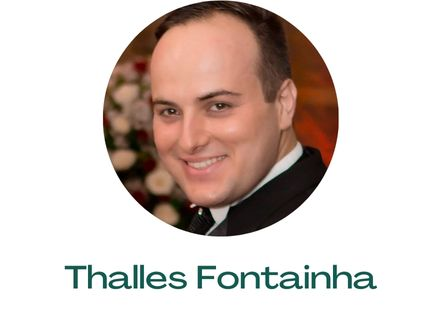 Thalles Fontainha é profissional de Ciência da Computação com experiência em atendimento ao cliente na área de TI e trabalha na StarOne/CLARO Brasil. Em seu projeto final em 2022, integrou o Whatsapp e SUS usando Inteligência Artificial. Contribui para elevar padrões de serviço em TI, valorizando a diversidade. Além disso, aprofunda seus conhecimentos em Business Intelligence com base em sua formação na UERJ e cursos e certificações online.

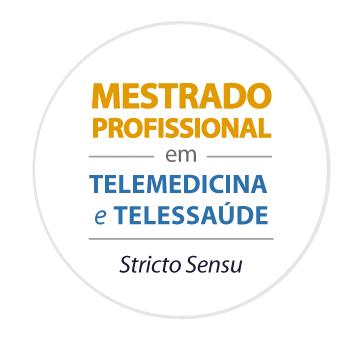

---

O objetivo é obter um modelo de Machine Learning para realizar uma terefa de classificação **OU** uma de regressão, sobre o conjunto de dados births.csv, disponível para download no AVA.

Caso a escolha seja construir um modelo de **classificação** o objetivo será predizer se a criança tem baixo peso ou não, ou seja, a variável (atributo) alvo será **lowbirthweight**:


Caso a escolha seja construir um modelo de **regressão** o objetivo será predizer o peso da criança ao nascer, ou não, ou seja, a variável (atributo) alvo será **weight**:

Instruções:

1) use este notebook para realizar o trabalho;

2) suba para o ambiente de programação do Google Colab o arquivo births.csv, disponível no AVA.

3) realize, no mínimo, as etapas presentes neste notebook

4) Crie celulas de texto para comentar todo o raciocínio, as decisões tomadas e discutir os resultados obtidos.

**IMPORTANTE: É OBRIGATÓRIO OS COMENTÁRIOS CITADO NO ITEM (4) DAS INSTRUÇÕES.**

--------------------------------------------------------

**Dicionário do conjunto de dados births14.csv:**

**Descrição**
Todos os anos, os EUA divulgam ao público um grande conjunto de dados contendo informações
sobre os nascimentos registrados no país. Este conjunto de dados tem sido do interesse de
pesquisadores médicos que estudam a relação entre hábitos e práticas de mulheres grávidas e o
nascimento de seus filhos. Esta é uma amostra aleatória de 1.000 casos do conjunto de dados
divulgado em 2014.


# **Etapa 0: carregar as bibliotecas necessárias**

In [4]:
# Carregando os pacotes necessários
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split # para dividir a base em treinamento e teste
%matplotlib inline

#**Etapa 1: CARREGANDO OS DADOS:**

In [6]:
#carregando a base de dados de dados births14 de um arquivo csv
base = pd.read_csv('births14.csv') # Carregando a base de dados e a armazenando em um DataFrame Pandas

Esse dados abaixo foram estraido do arquivo 'births14.csv' da primeira linha do arquivo em questão que tem as seguintes variáveis: **fage, mage,	mature,	weeks, premie, visits,	gained,	weight,	lowbirthweight,	sex,	habit,	marital,	whitemom** - tais variaveis também podem ser vista na execução do item [6] 'base.columns' que mostra o mesmo resultado.

**Variáveis**:

*   fage - idade do pai em anos
*   mage - idade da mãe em anos
*   mature - maturidade da mãe (younger mom, mature mom)
*   weeks - duração da gestação em semanas
*   premie - se o nascimento foi classificado como prematuro (premie) ou a termo (full-term)
*   visits - número de visitas durante a gestação
*   gained - peso ganho pela mãe durante a gestação em libras
*   weight - peso da criança ao nascimento em libras
*   lowbirthweight - se a criança foi classificada como baixo peso (low) ou não (not low)
*   sex - sexo da criança, female ou male
*   habit - Status da mãe como não fumante (nonsmoker) ou fumante (smoker)
*   marital - se a mãe estava casada ou não no nascimento da criança
*   whitemom - se a mãe é branca ou não

**Fonte (com url):**
[United States Department of Health and Human Services. Centers for Disease Control and Prevention. National Center for Health Statistics. Natality Detail File, 2014 United States. Inter-university Consortium for Political and Social Research, 2016-10-07. doi: 10.3886/ICPSR36461.v1.](https://www.icpsr.umich.edu/web/ICPSR/studies/36461)

#**Etapa 2: EXPLORANDO/ENTENDENDO OS DADOS**

In [79]:
print(base.head(7),'\n') # Exibindo os 7 primeiros registros do DataFrame

   fage  mage       mature  weeks     premie  visits  gained  weight  \
0  34.0    34  younger mom     37  full term    14.0    28.0    6.96   
1  36.0    31  younger mom     41  full term    12.0    41.0    8.86   
2  37.0    36   mature mom     37  full term    10.0    28.0    7.51   
3   NaN    16  younger mom     38  full term     NaN    29.0    6.19   
4  32.0    31  younger mom     36     premie    12.0    48.0    6.75   
5  32.0    26  younger mom     39  full term    14.0    45.0    6.69   
6  37.0    36   mature mom     36     premie    10.0    20.0    6.13   

  lowbirthweight     sex      habit      marital   whitemom  
0        not low    male  nonsmoker      married      white  
1        not low  female  nonsmoker      married      white  
2        not low  female  nonsmoker      married  not white  
3        not low    male  nonsmoker  not married      white  
4        not low  female  nonsmoker      married      white  
5        not low  female  nonsmoker      married   

In [80]:
base.shape # Exindo o número de linhas e colunas do DataFrame

(1000, 13)

In [81]:
base.columns # Exibe as conlunas do DataFrame

Index(['fage', 'mage', 'mature', 'weeks', 'premie', 'visits', 'gained',
       'weight', 'lowbirthweight', 'sex', 'habit', 'marital', 'whitemom'],
      dtype='object')

In [82]:
base.dtypes #Exibindo o tipo de cada variável

fage              float64
mage                int64
mature             object
weeks               int64
premie             object
visits            float64
gained            float64
weight            float64
lowbirthweight     object
sex                object
habit              object
marital            object
whitemom           object
dtype: object

In [83]:
base.info() # Número total de linhas e o tipo de cada atributo e o número de valores não nulos
#Tipo = object indica um texto, neste caso

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            886 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           1000 non-null   int64  
 4   premie          1000 non-null   object 
 5   visits          944 non-null    float64
 6   gained          958 non-null    float64
 7   weight          1000 non-null   float64
 8   lowbirthweight  1000 non-null   object 
 9   sex             1000 non-null   object 
 10  habit           981 non-null    object 
 11  marital         1000 non-null   object 
 12  whitemom        1000 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 101.7+ KB


In [84]:
base.describe() # Resumindo as variáveis numéricas com medidas de posição, centralidade e variabilidade (informações estatísticas)

,fage,mage,weeks,visits,gained,weight
count,886.000000,1000.000000,1000.000000,944.000000,958.000000,1000.000000
mean,31.133183,28.449000,38.666000,11.351695,30.425887,7.198160
std,7.058135,5.759737,2.564961,4.108192,15.242527,1.306775
min,15.000000,14.000000,21.000000,0.000000,0.000000,0.750000
25%,26.000000,24.000000,38.000000,9.000000,20.000000,6.545000
50%,31.000000,28.000000,39.000000,12.000000,30.000000,7.310000
75%,35.000000,33.000000,40.000000,14.000000,38.000000,8.000000
max,85.000000,47.000000,46.000000,30.000000,98.000000,10.620000


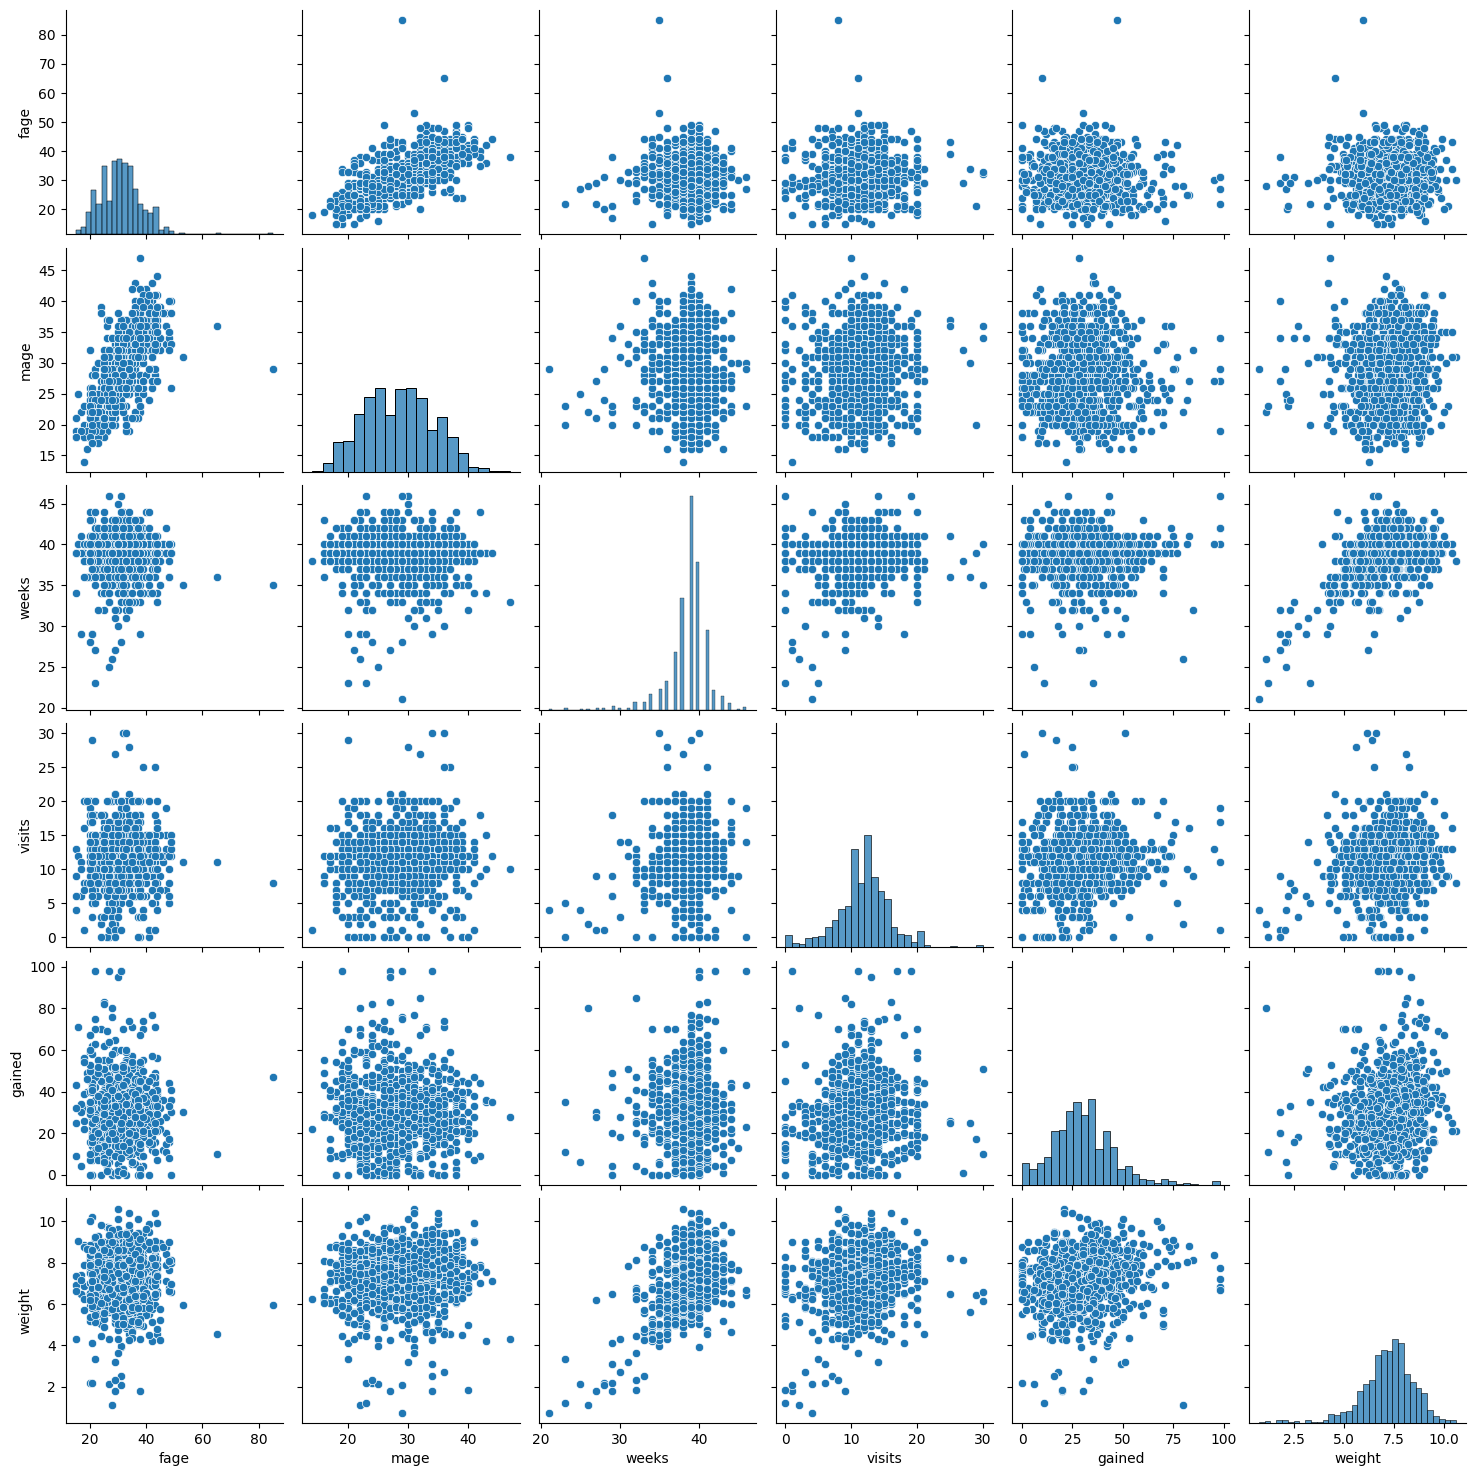

In [85]:
#Análise BI-VARIADAS entre as variáveis do estudo
sns.pairplot(base)

**O código executado [10]"sns.pairplot(base)" realiza uma análise de variáveis bidimensionais (BI-VARIADAS) entre todas as variáveis presentes no DataFrame 'base', utilizando a biblioteca seaborn (sns). O método 'pairplot' cria um gráfico de dispersão para cada par de variáveis, mostrando as relações e distribuições conjuntas entre elas. O resultado é um conjunto de gráficos que facilitam a visualização de padrões e tendências nos dados. O objeto seaborn.axisgrid.PairGrid retornado pode ser utilizado para personalizar ainda mais a visualização, se necessário**

<ipython-input-86-583c9aad5f56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = base.corr()


<Axes: >

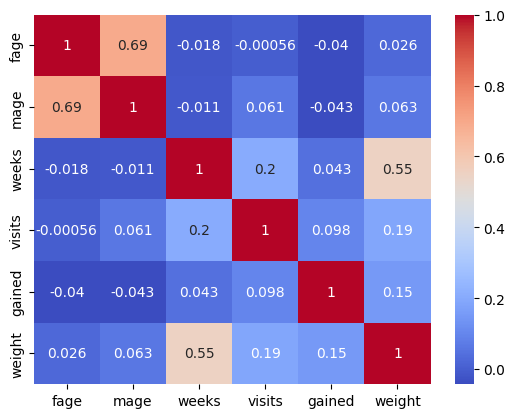

In [86]:
# construindo a matriz (mapa) de correlação
correlacoes = base.corr()
sns.heatmap(correlacoes, cmap='coolwarm', annot=True)

**O código cria um mapa de calor que representa visualmente as correlações entre as variáveis do DataFrame 'base'. O mapa de calor usa cores para indicar o grau e direção das relações estatísticas entre as variáveis, tornando mais fácil identificar padrões. O aviso alerta sobre uma mudança futura no comportamento padrão da função de correlação utilizada.**

# **Etapa 3: PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING**

**Dividindo os atributos entre previsores e alvo (desfecho)**

In [201]:
# Previsores (Features)
previsores = base[['fage', 'mage', 'mature', 'weeks', 'premie', 'visits', 'gained', 'lowbirthweight', 'sex', 'marital', 'whitemom']]

# Desfecho (Target)
desfecho = base[['weight']]

**Explicação do nosso grupo para escolha dos previsores e desfecho acima:**

*   Os previsores foram escolhidos porque são características relacionadas ao processo de gestação e ao ambiente materno, e podem influenciar no peso da criança ao nascer.

*   O desfecho escolhido, weight, é uma medida direta do resultado que se quer prever, ou seja, o peso da criança ao nascer, que é frequentemente utilizado como indicador de saúde e desenvolvimento.
Essa escolha foi feita com base na lógica do problema que você está tentando resolver ou na análise que *estamos* conduzindo.

In [202]:
previsores

,fage,mage,mature,weeks,premie,visits,gained,lowbirthweight,sex,marital,whitemom
0,34.0,34,younger mom,37,full term,14.0,28.0,not low,male,married,white
1,36.0,31,younger mom,41,full term,12.0,41.0,not low,female,married,white
2,37.0,36,mature mom,37,full term,10.0,28.0,not low,female,married,not white
3,NaN,16,younger mom,38,full term,NaN,29.0,not low,male,not married,white
4,32.0,31,younger mom,36,premie,12.0,48.0,not low,female,married,white
...,...,...,...,...,...,...,...,...,...,...,...
994,29.0,24,younger mom,32,premie,8.0,33.0,low,female,married,white
996,37.0,31,younger mom,38,full term,8.0,33.0,not low,female,married,white
997,27.0,27,younger mom,34,premie,7.0,25.0,not low,female,married,white
998,NaN,33,younger mom,42,full term,0.0,13.0,not low,male,not married,white


In [203]:
desfecho

,weight
0,6.96
1,8.86
2,7.51
3,6.19
4,6.75
...,...
994,2.33
996,5.80
997,6.75
998,7.44


**Usando o sklearn para dividir com conjunto de dados entre treinamento e teste**

In [204]:
# treinamento = 80% e teste = 20% , parâmetro test_size=0.20.
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(previsores, desfecho, test_size=0.20, random_state=26) #random_state = semente

X_treinamento.shape, X_teste.shape # Exibe a forma dos conjuntos (número de registros, número de atributos)

((784, 11), (197, 11))

In [205]:
X_treinamento #apenas para mostrar como o train_test_split divide os dados de forma aleatória (veja os números das linhas)

,fage,mage,mature,weeks,premie,visits,gained,lowbirthweight,sex,marital,whitemom
494,43.0,41,mature mom,40,full term,14.0,33.0,not low,male,married,not white
35,38.0,47,mature mom,33,premie,10.0,28.0,low,male,not married,not white
827,65.0,36,mature mom,36,premie,11.0,10.0,low,female,married,not white
511,35.0,37,mature mom,41,full term,NaN,29.0,not low,female,married,white
278,24.0,25,younger mom,38,full term,13.0,14.0,not low,female,not married,white
...,...,...,...,...,...,...,...,...,...,...,...
979,15.0,18,younger mom,39,full term,6.0,32.0,not low,female,not married,white
440,30.0,24,younger mom,40,full term,13.0,17.0,not low,female,not married,not white
791,29.0,27,younger mom,39,full term,15.0,9.0,low,male,not married,white
324,NaN,22,younger mom,35,premie,8.0,5.0,low,male,not married,white


# **4. SELECIONANDO E TREINANDO UM MODELO**

# **4.1 Pré-processando os dados do conjunto de treinamento.**

O pré-processamento é uma etapa muito importante, onde iremos preparar os dados para que os algoritmo de Machine Learning os utilizem.

#**4.1.1 Tratando valores faltantes**

Algumas estratégias:

1.  Apagar os registros com atributos faltantes.
2.  Apagar a coluna do atributo que falta um valor ou mais de um valor.
3.  Substituir os valores faltantes por algum outro valor (zero, média, mediana, etc.), **é o que faremos aqui**.

É possivel fazer isso facilmente usando os métodos dropna() , drop() e fillna() do DataFrame:

In [188]:
# Escolhendo a opção (1) - para 'habit'
base.dropna(subset=["habit"], inplace=True) #esta operação irá remover as linhas em que a coluna 'habit' tem valores NaN no DataFrame base.


In [ ]:
# Escolhendo a estratégia (2)
#conjunto_treinamento.drop('glu',axis=1) #remove a coluna glu

In [207]:
X_treinamento.isna().sum()

fage              91
mage               0
mature             0
weeks              0
premie             0
visits            41
gained            29
lowbirthweight     0
sex                0
marital            0
whitemom           0
dtype: int64

In [208]:
Y_treinamento.isna().sum()

weight    0
dtype: int64

In [209]:
media_fage = round(X_treinamento['fage'].mean()) #cálculo da média
media_visits = round(X_treinamento['visits'].mean()) #cálculo da média
media_gained = round(X_treinamento['gained'].mean()) #cálculo da média
media_weight = round(Y_treinamento['weight'].mean()) #cálculo da média

X_treinamento['fage'].fillna(media_fage, inplace=True) #preencher com a médias dos valores
X_treinamento['visits'].fillna(media_visits, inplace=True) #preencher com a médias dos valores
X_treinamento['gained'].fillna(media_gained, inplace=True) #preencher com a médias dos valores
X_treinamento['visits'].fillna(media_visits, inplace=True) #preencher com a médias dos valores


In [210]:
X_treinamento.isna().sum()

fage              0
mage              0
mature            0
weeks             0
premie            0
visits            0
gained            0
lowbirthweight    0
sex               0
marital           0
whitemom          0
dtype: int64

In [211]:
Y_treinamento.isna().sum()

weight    0
dtype: int64

#**4.1.2 Reescalagem dos atributos** - com alterações substancais para poder executar e debug com passos a mais:

Com poucas exceções, os algoritmos de Machine Learning não funcionam bem quando os atributos numéricos de entrada têm escalas muito diferentes.

**MinMaxScaler espera que todas as colunas numéricas contenham valores numéricos, mas em seu conjunto de dados, algumas colunas, como 'mature', 'premie', 'lowbirthweight', 'sex', 'habit', 'marital' e 'whitemom', são categóricas ou contêm strings.**

**Para resolver isso, precisamos primeiro separar as colunas numéricas das colunas categóricas, aplicar o normalizador apenas às colunas numéricas e, em seguida, juntar os resultados novamente. Aqui está uma maneira como fizemos isso:**

In [216]:
colunas_numericas = ['fage', 'mage', 'weeks', 'visits', 'gained']
colunas_categoricas = ['mature', 'premie', 'lowbirthweight', 'sex', 'marital', 'whitemom']

# ndo se todas as colunas estão presentes
print(set(colunas_numericas) <= set(X_treinamento.columns))
print(set(colunas_categoricas) <= set(X_treinamento.columns))


True
True


In [217]:
# Certificando-se de que as colunas numéricas são do tipo numérico
print(X_treinamento[colunas_numericas].dtypes)


fage      float64
mage        int64
weeks       int64
visits    float64
gained    float64
dtype: object


In [218]:
# Tentar normalizar apenas as colunas numéricas
normalizador = MinMaxScaler()
X_treinamento_numericas = normalizador.fit_transform(X_treinamento[colunas_numericas])
X_treinamento_numericas = pd.DataFrame(X_treinamento_numericas, columns=colunas_numericas)

# Juntar as colunas normalizadas com as colunas categóricas
X_treinamento = pd.concat([X_treinamento_numericas, X_treinamento[colunas_categoricas]], axis=1)

# Verificar as primeiras linhas do DataFrame resultante
print(X_treinamento.head())


   fage      mage     weeks    visits    gained       mature     premie  \
0  0.56  0.818182  0.739130  0.466667  0.336735  younger mom  full term   
1  0.46  1.000000  0.434783  0.333333  0.285714  younger mom  full term   
2  1.00  0.666667  0.565217  0.366667  0.102041   mature mom  full term   
3  0.40  0.696970  0.782609  0.366667  0.295918  younger mom  full term   
4  0.18  0.333333  0.652174  0.433333  0.142857          NaN        NaN   

  lowbirthweight     sex      marital   whitemom  
0        not low    male      married      white  
1        not low  female      married      white  
2        not low  female      married  not white  
3        not low    male  not married      white  
4            NaN     NaN          NaN        NaN  


In [199]:
# Substituir valores categóricos por números (apenas para exemplo)
mapeamento_categorico = {
    'mature': {'younger mom': 0, 'mature mom': 1},
    'premie': {'full term': 0, 'premie': 1},
    'lowbirthweight': {'not low': 0, 'low': 1},
    'sex': {'male': 0, 'female': 1},
    'habit': {'nonsmoker': 0, 'smoker': 1},  # Substitua por um mapeamento apropriado
    'marital': {'married': 0, 'not married': 1},  # Substitua por um mapeamento apropriado
    'whitemom': {'white': 0, 'not white': 1}  # Substitua por um mapeamento apropriado
}

# Aplicar mapeamento às colunas categóricas
X_treinamento.replace(mapeamento_categorico, inplace=True)

# Agora, tentar novamente a normalização
normalizador = MinMaxScaler()
X_treinamento_numericas = normalizador.fit_transform(X_treinamento[colunas_numericas])
X_treinamento_numericas = pd.DataFrame(X_treinamento_numericas, columns=colunas_numericas)

# Juntar as colunas normalizadas com as colunas categóricas
X_treinamento = pd.concat([X_treinamento_numericas, X_treinamento[colunas_categoricas]], axis=1)

# Verificar as primeiras linhas do DataFrame resultante
print(X_treinamento.head())


   fage      mage     weeks    visits    gained  mature  premie  \
0  0.56  0.818182  0.739130  0.466667  0.336735     0.0     0.0   
1  0.46  1.000000  0.434783  0.333333  0.285714     0.0     0.0   
2  1.00  0.666667  0.565217  0.366667  0.102041     1.0     0.0   
3  0.40  0.696970  0.782609  0.366667  0.295918     0.0     0.0   
4  0.18  0.333333  0.652174  0.433333  0.142857     NaN     NaN   

   lowbirthweight  sex  habit  marital  whitemom  
0             0.0  0.0    0.0      0.0       0.0  
1             0.0  1.0    0.0      0.0       0.0  
2             0.0  1.0    0.0      0.0       1.0  
3             0.0  0.0    0.0      1.0       0.0  
4             NaN  NaN    NaN      NaN       NaN  


In [220]:
from sklearn.preprocessing import MinMaxScaler

# Lista de colunas numéricas
colunas_numericas = ['fage', 'mage', 'weeks', 'visits', 'gained']

# Lista de colunas categóricas
colunas_categoricas = ['mature', 'premie', 'lowbirthweight', 'sex', 'marital', 'whitemom']

# Normalizar apenas as colunas numéricas
normalizador = MinMaxScaler()
X_treinamento_numericas = normalizador.fit_transform(X_treinamento[colunas_numericas])
X_treinamento_numericas = pd.DataFrame(X_treinamento_numericas, columns=colunas_numericas)

# Juntar as colunas normalizadas com as colunas categóricas
X_treinamento = pd.concat([X_treinamento_numericas, X_treinamento[colunas_categoricas]], axis=1)
X_treinamento

,fage,mage,weeks,visits,gained,mature,premie,lowbirthweight,sex,marital,whitemom
0,0.56,0.818182,0.739130,0.466667,0.336735,younger mom,full term,not low,male,married,white
1,0.46,1.000000,0.434783,0.333333,0.285714,younger mom,full term,not low,female,married,white
2,1.00,0.666667,0.565217,0.366667,0.102041,mature mom,full term,not low,female,married,not white
3,0.40,0.696970,0.782609,0.366667,0.295918,younger mom,full term,not low,male,not married,white
4,0.18,0.333333,0.652174,0.433333,0.142857,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
971,NaN,NaN,NaN,NaN,NaN,mature mom,full term,low,male,not married,white
986,NaN,NaN,NaN,NaN,NaN,younger mom,full term,not low,male,not married,white
981,NaN,NaN,NaN,NaN,NaN,younger mom,full term,not low,female,not married,not white
967,NaN,NaN,NaN,NaN,NaN,younger mom,full term,not low,female,not married,white


**Dessa forma, depois de debug para garantir algumas coisas, aplicamos o normalizador apenas às colunas numéricas, mantendo as colunas categóricas intactas.**

#**4.3  Treinando e validando modelos de regressão linear, no conjunto de teste, para selecionar um deles**

In [221]:
from sklearn.model_selection import cross_val_score # para utilizar a técnica de validação k-fold cross validation
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn import metrics #bibliotecas para utilizar métricas comuns em tarefa de regressão
from sklearn.metrics import mean_absolute_error #biblioteca para utilizar métrica Perda média de regressão de erro absoluto
from yellowbrick.regressor import ResidualsPlot #biblioteca para plotar o gráfico de resíduos
import joblib #biblioteca para salvar em disco os modelos contruídos e carregá-los de lá.

**4.3.1 Regressão Linear multipla**

In [222]:
from sklearn.linear_model import LinearRegression

In [226]:
from sklearn.impute import SimpleImputer

# Criar um imputador
imputer = SimpleImputer(strategy='mean')  # Você pode escolher outra estratégia, como 'median' ou 'most_frequent'

# Aplicar o imputador ao conjunto de treinamento codificado
X_treinamento_encoded_imputed = pd.DataFrame(imputer.fit_transform(X_treinamento_encoded), columns=X_treinamento_encoded.columns)

# Agora, ajustar o modelo de regressão linear aos dados imputados
reg_lin = LinearRegression()
reg_lin.fit(X_treinamento_encoded_imputed, Y_treinamento)
predicoes = reg_lin.predict(X_treinamento_encoded_imputed)

# No contexto apresentado acima, a aplicação de Machine Learning considerando diversas variáveis, revelou desafios associados a valores ausentes e tipos de dados não numéricos. Para lidar com os valores faltantes, foi adotada a estratégia de imputação, preenchendo os dados ausentes com a média dos valores existentes em cada coluna numérica. Isso foi realizado utilizando o SimpleImputer do scikit-learn. Após a imputação, os dados foram normalizados e o modelo de regressão linear foi ajustado.

In [227]:
print('MAE:', metrics.mean_absolute_error(Y_treinamento, predicoes)) #Diferenças absolutas entre as previsões e os valores reais, , quando maior, pior
print('MSE:', metrics.mean_squared_error(Y_treinamento, predicoes)) #Diferenças elevadas ao quadrado (penalizando os erros) quanto maior, pior
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treinamento, predicoes)))#Raiz quadrada do MSE, quando maior, pior

MAE: 0.8266243450122578
MSE: 1.1098050552328838
RMSE: 1.0534728545306158


In [234]:
reg_lin.score(X_treinamento_encoded_imputed, Y_treinamento) #para avaliar a qualidade do modelo , quanto mais próximo de 1, melhor

0.2802185775287831

**Realizando a técnica de validação k-fold cross validation**

In [235]:
resultados = cross_val_score(reg_lin,X_treinamento_encoded_imputed, Y_treinamento, scoring='neg_mean_squared_error', cv=10) # Aqui está sendo utilizado o MSE, que é: a diferenças elevadas ao quadrado (penalizando os erros) quanto maior, pior
print('Resultados:', -resultados)
print('Média dos resultados:', -resultados.mean())
print('Desvio padrão dos resultados:', resultados.std())

Resultados: [1.076507   1.19621903 1.35056866 0.98832556 1.3116431  1.12297434
 0.89161248 1.43271462 1.05969473 1.11806062]
Média dos resultados: 1.1548320137003754
Desvio padrão dos resultados: 0.1601237214948947


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


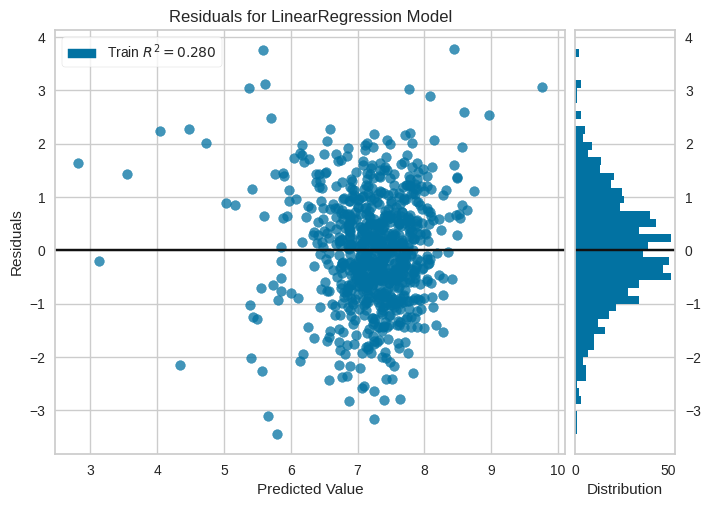

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [236]:
visualizador = ResidualsPlot(reg_lin)
visualizador.fit(X_treinamento_encoded_imputed, Y_treinamento)
visualizador.poof()

In [237]:
import joblib
joblib.dump(reg_lin, "reg_lin.pkl")
# Se quiser carregar o modelo salvo use:
#lin_reg = joblib.load("reg_lin.pkl")

['reg_lin.pkl']

**4.2.1 Regressão Linear com reguralização (Ridge)**

In [238]:
from sklearn.linear_model import Ridge

In [239]:
reg_lin_Ridge = Ridge()
reg_lin_Ridge.fit(X_treinamento_encoded_imputed, Y_treinamento)
previsoes = reg_lin_Ridge.predict(X_treinamento_encoded_imputed)
print(reg_lin_Ridge.intercept_)
print(reg_lin_Ridge.coef_)
print(previsoes)

[3.03312194]
[[-0.07918009  0.59907607  5.08480242  0.60124161  0.8240427   0.17034473
  -0.09518986 -0.22670546  0.18488803 -0.03289223 -0.01212771]]
[[7.91172923]
 [6.17392503]
 [6.30518044]
 [7.94621034]
 [6.91299545]
 [7.60725169]
 [7.00371736]
 [8.40103192]
 [7.23287062]
 [7.08735777]
 [7.81390759]
 [6.73015251]
 [7.11586333]
 [6.98180454]
 [7.04688131]
 [7.28448228]
 [7.9327207 ]
 [7.82628705]
 [7.34641132]
 [6.67505206]
 [6.96222727]
 [5.54428863]
 [7.60926986]
 [6.95879397]
 [7.17893154]
 [7.3660116 ]
 [7.50910377]
 [7.73035064]
 [5.28931915]
 [6.6154257 ]
 [7.57425314]
 [6.85521486]
 [7.0450181 ]
 [7.08224046]
 [7.94481563]
 [7.89398749]
 [7.91842013]
 [7.62932468]
 [7.19356132]
 [7.55149505]
 [7.32105315]
 [7.60384068]
 [7.12098324]
 [7.02829538]
 [7.30042752]
 [6.93337734]
 [7.4542778 ]
 [7.59736364]
 [7.14678836]
 [7.4055998 ]
 [7.36939388]
 [7.61556955]
 [7.0599886 ]
 [6.85275058]
 [6.1474168 ]
 [7.25765246]
 [7.75491338]
 [7.88152509]
 [7.03717652]
 [6.79419727]
 [7.91449

In [240]:
print('MAE:', metrics.mean_absolute_error(Y_treinamento, previsoes)) #Diferenças absolutas entre as previsões e os valores reais, , quando maior, pior
print('MSE:', metrics.mean_squared_error(Y_treinamento, previsoes)) #Diferenças elevadas ao quadrado (penalizando os erros) quanto maior, pior
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treinamento, previsoes)))#Raiz quadrada do MSE, quando maior, pior

MAE: 0.8281738532496736
MSE: 1.1137093637179372
RMSE: 1.0553242931525537


In [241]:
reg_lin_Ridge.score(X_treinamento_encoded_imputed, Y_treinamento) #para avaliar a qualidade do modelo , quanto mais próximo de 1, melhor

0.27768637720955813

In [242]:
resultados = cross_val_score(reg_lin_Ridge,X_treinamento_encoded_imputed, Y_treinamento, scoring='neg_mean_squared_error', cv=10)
print('Resultados:', -resultados)
print('Média dos resultados:', -resultados.mean())
print('Desvio padrão dos resultados:', resultados.std())

Resultados: [1.0885629  1.22565407 1.35881542 0.98313874 1.33720812 1.13815668
 0.85379281 1.44685491 1.03625783 1.11684601]
Média dos resultados: 1.15852875086444
Desvio padrão dos resultados: 0.17472903967730558


In [244]:
X_treinamento_encoded_imputed.shape

(784, 11)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


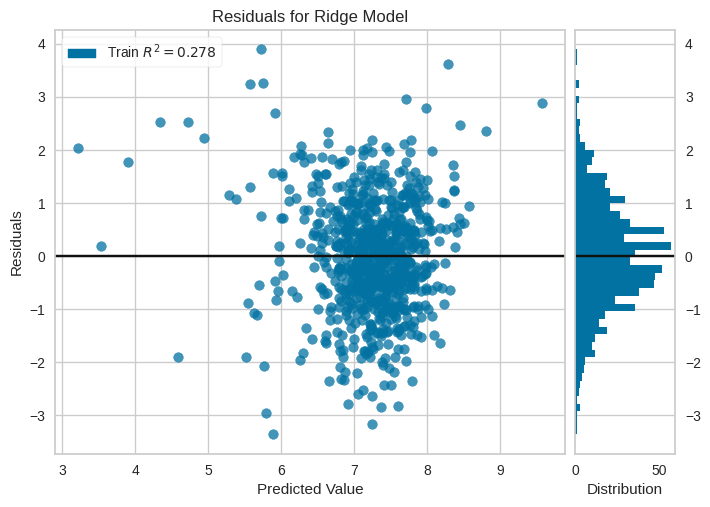

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [245]:
visualizador = ResidualsPlot(reg_lin_Ridge)
visualizador.fit(X_treinamento_encoded_imputed, Y_treinamento)
visualizador.poof()

In [246]:
import joblib
joblib.dump(reg_lin_Ridge, "reg_lin_Ridge.pkl") #salvando o modelo gerado
# Se quiser carregar o modelo salvo use:
#lin_reg = joblib.load("reg_lin_Ridge.pkl")

['reg_lin_Ridge.pkl']

**4.2.2 Regressão Linear com reguralização (Lasso)**

In [247]:
from sklearn.linear_model import Lasso

In [248]:
reg_lin_Lasso = Lasso(random_state=0)
reg_lin_Lasso.fit(X_treinamento_encoded_imputed, Y_treinamento)
previsoes = reg_lin_Lasso.predict(X_treinamento_encoded_imputed)
print(reg_lin_Lasso.intercept_)
print(reg_lin_Lasso.coef_)
print(previsoes)

[7.22479592]
[ 0.  0.  0.  0.  0.  0.  0. -0.  0.  0. -0.]
[7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592 7.22479592
 7.

In [249]:
print('MAE:', metrics.mean_absolute_error(Y_treinamento, previsoes)) #Diferenças absolutas entre as previsões e os valores reais, , quando maior, pior
print('MSE:', metrics.mean_squared_error(Y_treinamento, previsoes)) #Diferenças elevadas ao quadrado (penalizando os erros) quanto maior, pior
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treinamento, previsoes)))#Raiz quadrada do MSE, quando maior, pior

MAE: 0.9332543731778425
MSE: 1.541863988962932
RMSE: 1.2417181600358964


In [250]:
reg_lin_Lasso.score(X_treinamento_encoded_imputed, Y_treinamento) #para avaliar a qualidade do modelo , quanto mais próximo de 1, melhor

0.0

In [251]:
resultados = cross_val_score(reg_lin_Lasso,X_treinamento_encoded_imputed, Y_treinamento, scoring='neg_mean_squared_error', cv=10)
print('Resultados:', -resultados)
print('Média dos resultados:', -resultados.mean())
print('Desvio padrão dos resultados:', resultados.std())

Resultados: [1.54579792 2.01765212 1.69098036 1.39319172 2.12135597 1.43919701
 0.93124412 2.01465209 0.99523232 1.2959445 ]
Média dos resultados: 1.5445248117485002
Desvio padrão dos resultados: 0.39656997074677464


In [252]:
import joblib
joblib.dump(reg_lin_Lasso, "reg_lin_Lasso.pkl")
# Se quiser carregar o modelo salvo use:
#lin_reg = joblib.load("reg_lin_Lasso.pkl")

['reg_lin_Lasso.pkl']

#**4.3 Ajuste do modelo selecionado**

 Intuitivamente, podemos pensar nesses hiperparâmetros como parâmetros que não são aprendidos com os dados, mas representam os botões de um modelo que podemos usar para melhorar seu desempenho.

In [253]:
from pprint import pprint  # Para imprimir os parâmetros de uma função

In [254]:
print('Hiperparâmetros usando pela regressão linear Ridge:\n')
pprint(reg_lin_Ridge.get_params())

Hiperparâmetros usando pela regressão linear Ridge:

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}


**4.3.1 Grid de hiperparâmetros**

In [255]:
from sklearn.model_selection import GridSearchCV # Para realizar a varredura de hiperparâmetros

In [256]:
grid_parametros = {'tol': [0.000001, 0.00001, 0.0001, 0.001],
                   'alpha': [0.5, 1.0, 3.0, 5.0, 10.0, 20.0],
                   'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                   'max_iter': [1000, 5000, 1000, 15000],
                   }
grid_pesquisa = GridSearchCV(reg_lin_Ridge, grid_parametros, cv=5)
grid_pesquisa.fit(X_treinamento_encoded_imputed, Y_treinamento)
print("Melhores parâmetros: {}".format(grid_pesquisa.best_params_))
print("Melhor taxa de acertos {}".format(grid_pesquisa.best_score_))

Melhores parâmetros: {'alpha': 0.5, 'max_iter': 1000, 'solver': 'lsqr', 'tol': 0.001}
Melhor taxa de acertos 0.2275521133218624


#**4.4 Modelo final - útimo treinamento**

**Aqui iremos treinar o modelo ajustado (com os melhores hiperparâmetros) com todo conjunto de treinamento para a obtenção do modelo final**

In [257]:
reg_lin_Ridge_MF = Ridge(alpha=1.0, max_iter=1000, tol=0.001, solver='sag')
reg_lin_Ridge_MF.fit(X_treinamento_encoded_imputed, Y_treinamento)
previsoes = reg_lin_Ridge_MF.predict(X_treinamento_encoded_imputed)
print(reg_lin_Ridge_MF.intercept_)
print(reg_lin_Ridge_MF.coef_)
print(previsoes)

[3.03024056]
[[-0.08002662  0.59914543  5.08431326  0.6030749   0.82558467  0.17106911
  -0.09578261 -0.22420739  0.18534994 -0.03412285 -0.01162324]]
[[7.9136326 ]
 [6.1752895 ]
 [6.30454991]
 [7.94674259]
 [6.91068051]
 [7.60882226]
 [7.00424052]
 [8.4018408 ]
 [7.23396294]
 [7.08751897]
 [7.81181386]
 [6.72781628]
 [7.11572598]
 [6.98210772]
 [7.04626473]
 [7.28486927]
 [7.933957  ]
 [7.82501307]
 [7.34736468]
 [6.6753531 ]
 [6.96501823]
 [5.54417462]
 [7.61015022]
 [6.95819421]
 [7.18076557]
 [7.36355739]
 [7.51109443]
 [7.730501  ]
 [5.29217085]
 [6.61661099]
 [7.57599901]
 [6.85575474]
 [7.04675323]
 [7.08410051]
 [7.94526408]
 [7.89003466]
 [7.9199335 ]
 [7.62954631]
 [7.19413871]
 [7.55171506]
 [7.32122502]
 [7.60460855]
 [7.12283336]
 [7.02770919]
 [7.29808292]
 [6.93405639]
 [7.45235958]
 [7.59562829]
 [7.14441121]
 [7.40365462]
 [7.36718365]
 [7.61668697]
 [7.06077669]
 [6.84993772]
 [6.14814863]
 [7.2551812 ]
 [7.75318867]
 [7.87934268]
 [7.03488129]
 [6.79599479]
 [7.91550

In [258]:
resultados = cross_val_score(reg_lin_Ridge_MF,X_treinamento_encoded_imputed, Y_treinamento, scoring='neg_mean_squared_error', cv=10)
print('Resultados:', -resultados)
print('Média dos resultados:', -resultados.mean())
print('Desvio padrão dos resultados:', resultados.std())

Resultados: [1.08883117 1.22506289 1.3585323  0.98380489 1.33722644 1.13859549
 0.85387866 1.44748056 1.03670044 1.11672968]
Média dos resultados: 1.1586842506817054
Desvio padrão dos resultados: 0.17465350596062149


In [259]:
import joblib
joblib.dump(reg_lin_Ridge_MF, "reg_lin_Ridge_MF.pkl")
# Se quiser carregar o modelo salvo use:
#lin_reg = joblib.load("reg_lin_Ridge_MF.pkl")

['reg_lin_Ridge_MF.pkl']

#**Etapa 5: AVALIAR O MODELO NO CONJUNTO DE TESTE**

# **5.1 PRÉ-PROCESSAMENTO DO DADOS NO CONJUNTO DE TESTE**

#**5.4 Avaliação no conjunto de teste**

In [109]:
from joblib import load

In [260]:
###   lin_reg.fit(X_teste,Y_teste) ### Lembre-se, não se faz o treinamento no conjunto de teste.
reg_lin_final = joblib.load("reg_lin_Ridge_MF.pkl") #carregamos o melhor modelo salvo
previsoes = reg_lin_final.predict(X_treinamento_encoded_imputed)
print(reg_lin_final.intercept_)
print(reg_lin_final.coef_)
print(previsoes)

[3.03024056]
[[-0.08002662  0.59914543  5.08431326  0.6030749   0.82558467  0.17106911
  -0.09578261 -0.22420739  0.18534994 -0.03412285 -0.01162324]]
[[7.9136326 ]
 [6.1752895 ]
 [6.30454991]
 [7.94674259]
 [6.91068051]
 [7.60882226]
 [7.00424052]
 [8.4018408 ]
 [7.23396294]
 [7.08751897]
 [7.81181386]
 [6.72781628]
 [7.11572598]
 [6.98210772]
 [7.04626473]
 [7.28486927]
 [7.933957  ]
 [7.82501307]
 [7.34736468]
 [6.6753531 ]
 [6.96501823]
 [5.54417462]
 [7.61015022]
 [6.95819421]
 [7.18076557]
 [7.36355739]
 [7.51109443]
 [7.730501  ]
 [5.29217085]
 [6.61661099]
 [7.57599901]
 [6.85575474]
 [7.04675323]
 [7.08410051]
 [7.94526408]
 [7.89003466]
 [7.9199335 ]
 [7.62954631]
 [7.19413871]
 [7.55171506]
 [7.32122502]
 [7.60460855]
 [7.12283336]
 [7.02770919]
 [7.29808292]
 [6.93405639]
 [7.45235958]
 [7.59562829]
 [7.14441121]
 [7.40365462]
 [7.36718365]
 [7.61668697]
 [7.06077669]
 [6.84993772]
 [6.14814863]
 [7.2551812 ]
 [7.75318867]
 [7.87934268]
 [7.03488129]
 [6.79599479]
 [7.91550

In [262]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_treinamento, previsoes)) #Diferenças absolutas entre as previsões e os valores reais, , quando maior, pior
print('MSE:', metrics.mean_squared_error(Y_treinamento, previsoes)) #Diferenças elevadas ao quadrado (penalizando os erros) quanto maior, pior
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treinamento, previsoes)))#Raiz quadrada do MSE, quando maior, pior

MAE: 0.8281028661621646
MSE: 1.1137126608462413
RMSE: 1.0553258552912657


In [263]:
reg_lin_final.score(X_treinamento_encoded_imputed, Y_treinamento) #para avaliar a qualidade do modelo , quanto mais próximo de 1, melhor

0.2776842388054396

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


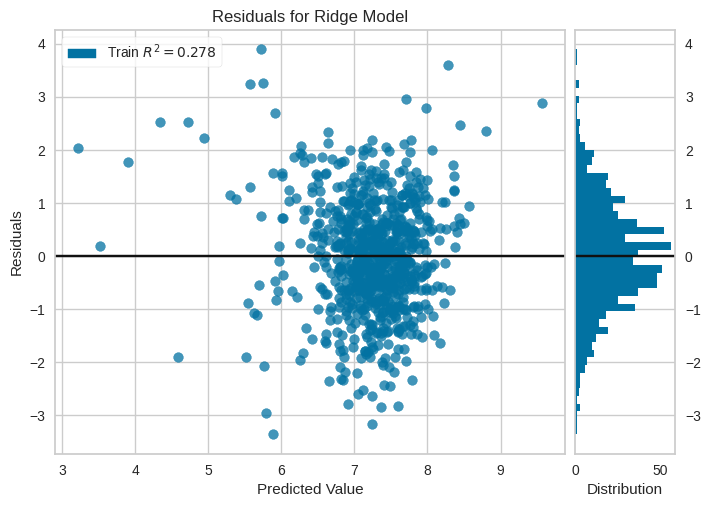

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [264]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(reg_lin_final)
visualizador.fit(X_treinamento_encoded_imputed, Y_treinamento)
visualizador.poof()